# Introduction - cid_mosaic

Welcome!

This notebook is intended as a preparation for the second workshop and it introduces a custom made Python class designed to help you analyze the simulation results from Eclipse MOSAIC. It can also be used to programmatically interact with the federate configurations.

Make sure everything works before attending the workshop.

For questions, troubleshooting and bugs please reach me (Ongun Türkcüoglu) via email: ongun.turkcuoglu@campus.tu-berlin.de 

## Lets start by importing the modules we need for our analysis!

Hint: You can display the documentation by highlighting the object/method and pressing Shift+Tab

In [3]:
from cid_mosaic import cid_mosaic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Init seaborn for pretty plots
sns.set()

# Larger plots
matplotlib.rcParams['figure.figsize'] = [15, 5]

Initialize the toolbox using the path to your Eclipse MOSAIC installation, i.e. `'/home/onqi/Documents/eclipse_mosaic/'`.

In [4]:
mosaic = cid_mosaic('/home/onqi/Documents/eclipse_mosaic')

Loading latest simulation result 'log-20210701-125056-Barnim'


The method `run_simulation()` will run the selected simulation and display the terminal output in the notebook.

In [3]:
mosaic.run_simulation()

Running: ./mosaic.sh -s Barnim -v
2021-06-30 18:25:43,207 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v11.0.9 (Amazon.com Inc.)
2021-06-30 18:25:43,707 INFO  FederationManagement - Start federation with id 'Barnim'
2021-06-30 18:25:43,709 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-06-30 18:25:43,710 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-06-30 18:25:43,711 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-06-30 18:25:43,711 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-06-30 18:25:43,712 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-06-30 18:25:43,712 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-06-30 18:25:43,815 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-06-30 18:25:43,816 INFO  FederationManagement - Add ambassador/federate with id 'output'
18:25

Now that we ran the simulation, we can access the generateed output. Normally, this file is in your Eclipse MOSAIC folder under `logs/log-{yyyymmdd}-{hhmmss}-{simulation-name}`

However, you can simply call the method `select_simulation_result(idx=0)` to access and generate pandas DataFrame of your latest simulation.

Hint: idx=0 is the most recent simulation, idx:1..n is previous simulations, with ascending integers corresponding to older simulations. 

In [5]:
mosaic.set_simulation_result(idx=0)

Loading latest simulation result 'log-20210701-125056-Barnim'


## Working with MOSAIC DataFrames

After you select the simulation results using `select_simulation_result()`, a DataFrame is generated, which holds every single log event that took place during simulation runtime.

However, not all data is interesting, especially if you are looking at unique vehicles or want to plot only certain traffic lights and road side units for your reports. There are three different calls you can make to find out which data you need/want/find interesting.

In [6]:
mosaic.get_df_events

['VEHICLE_UPDATES',
 'V2X_MESSAGE_RECEPTION',
 'V2X_MESSAGE_TRANSMISSION',
 'VEHICLE_REGISTRATION',
 'TRAFFICLIGHT_REGISTRATION',
 'TRAFFICSIGN_REGISTRATION',
 'CHANGE_SPEED',
 'RSU_REGISTRATION',
 'ADHOC_CONFIGURATION',
 'CELL_CONFIGURATION',
 'DETECTOR_UPDATES',
 'LANE_PROPERTY_CHANGE']

`get_df_events` returns a list of the events registered by the simulator. For example, a vehicle will register a `VEHICLE_UPDATES` event every time the application runs, and at each sampling instant, it will log certain values, for example, speed, position, heading, etc.

In [7]:
mosaic.get_df_labels('VEHICLE_UPDATES')

['Event',
 'Time',
 'Name',
 'Speed',
 'Heading',
 'PositionLatitude',
 'PositionLongitude',
 'PositionAltitude',
 'DistanceDriven',
 'LongitudinalAcceleration',
 'Slope',
 'Stopped',
 'RouteId',
 'RoadPositionConnectionId',
 'RoadPositionLaneIndex',
 'VehicleEmissionsCurrentEmissionsCo2',
 'VehicleEmissionsCurrentEmissionsCo',
 'VehicleEmissionsCurrentEmissionsHc',
 'VehicleEmissionsCurrentEmissionsPmx',
 'VehicleEmissionsCurrentEmissionsNox',
 'VehicleConsumptionsCurrentConsumptionsFuel',
 'VehicleEmissionsAllEmissionsCo2',
 'VehicleEmissionsAllEmissionsCo',
 'VehicleEmissionsAllEmissionsHc',
 'VehicleEmissionsAllEmissionsPmx',
 'VehicleEmissionsAllEmissionsNox',
 'VehicleConsumptionsAllConsumptionsFuel',
 'VehicleSignalsBlinkerRight',
 'VehicleSignalsBlinkerLeft',
 'VehicleSignalsBrakeLight']

`get_df_labels` gives you the labels of the generated DataFrame. In pandas, these labels are called **Fields** and they label the columns.

In [6]:
mosaic.get_df_apps

['veh_96',
 'veh_92',
 'veh_90',
 'veh_86',
 'veh_82',
 'veh_80',
 'veh_76',
 'veh_72',
 'veh_70',
 'veh_66',
 'veh_62',
 'veh_60',
 'veh_6',
 'veh_56',
 'veh_52',
 'veh_50',
 'veh_46',
 'veh_42',
 'veh_40',
 'veh_36',
 'veh_32',
 'veh_30',
 'veh_26',
 'veh_22',
 'veh_20',
 'veh_2',
 'veh_16',
 'veh_12',
 'veh_116',
 'veh_112',
 'veh_110',
 'veh_106',
 'veh_102',
 'veh_100',
 'veh_10',
 'veh_0',
 'rsu_0']

`get_df_apps` returns a list of all the executed applications during runtime. If you need, for example, the vehicle with the index 0, you'd need the value `veh_0`. Other possible values are (in this case) `rsu_0, tl_0, tl_1, tl_2, veh_1, veh_2` or `veh_3`

### Filtering pd.DataFrame

Now that you know how to investigate the simulation output, lets filter some data using numpy and pandas: `cid_mosaic` has a method called `df2np()`, which is just a wrapper for `np.asfarray()`.

Imagine you want to take a look at the speed of each vehicle for this simulation. You investigated the data and found out that there are four vehicles `veh_0`, `veh_1`, `veh_2` and `veh_3`. Since we want the speeds we are also going to need our event `VEHICLE_UPDATES`.

We also need a figure out which fields we are going to need. In this specific case, we can extract every field using `'all'` since there is only 7 of them, but in larger data sets you might want to specify which fields you need. For example: `mosaic.filter_df('VEHICLE_UPDATES', 'veh_0', 'Speed')` for speed of vehicle 0.

Hint: `Event`, `Time` and `Name` (application name) are always extracted and you don't need to specify these again.

In [7]:
veh0 = mosaic.filter_df(Event='VEHICLE_UPDATES', Name='veh_0', select='all')
veh1 = mosaic.filter_df(Event='VEHICLE_UPDATES', Name='veh_1', select='all')
veh2 = mosaic.filter_df(Event='VEHICLE_UPDATES', Name='veh_2', select='all')
veh3 = mosaic.filter_df(Event='VEHICLE_UPDATES', Name='veh_3', select='all')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (3,5,6,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
veh0

,Event,Time,Name,Speed,Heading,PositionLatitude,PositionLongitude,PositionAltitude,DistanceDriven,LongitudinalAcceleration,...,VehicleConsumptionsCurrentConsumptionsFuel,VehicleEmissionsAllEmissionsCo2,VehicleEmissionsAllEmissionsCo,VehicleEmissionsAllEmissionsHc,VehicleEmissionsAllEmissionsPmx,VehicleEmissionsAllEmissionsNox,VehicleConsumptionsAllConsumptionsFuel,VehicleSignalsBlinkerRight,VehicleSignalsBlinkerLeft,VehicleSignalsBrakeLight
50,VEHICLE_UPDATES,7000000000,veh_0,34.82466244661715,186.33265938410221,52.6560022198442,13.569067123065468,0.0,34.82466244661714,-1.2853375533828526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
52,VEHICLE_UPDATES,8000000000,veh_0,35.08759377758484,186.33265938410452,52.65568818530395,13.569020171533026,0.0,69.91225622420188,0.26293133096769594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
54,VEHICLE_UPDATES,9000000000,veh_0,35.867793266722,186.33265938410452,52.65536716793438,13.568972176649016,0.0,105.78004949092383,0.7801994891371606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
57,VEHICLE_UPDATES,10000000000,veh_0,35.43930978522636,186.33265938410221,52.65504998546848,13.568924755768087,0.0,141.21935927615027,-0.42848348149564686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
62,VEHICLE_UPDATES,11000000000,veh_0,35.99817710604053,186.33265938410452,52.6547278010985,13.56887658773249,0.0,177.2175363821907,0.5588673208141728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53592,VEHICLE_UPDATES,403000000000,veh_0,19.312721,219.6611188072729,52.610092,13.531815,0.0,6811.540517566441,0.4469640471972518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
53740,VEHICLE_UPDATES,404000000000,veh_0,18.345152,219.66111880727624,52.609963,13.531647,0.0,6829.885669505251,-0.9675695365993278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
53889,VEHICLE_UPDATES,405000000000,veh_0,18.570368,219.66111880727624,52.609832,13.531476,0.0,6848.456037783473,0.22521633941214247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
54037,VEHICLE_UPDATES,406000000000,veh_0,19.273827,219.66111880727624,52.609697,13.531299,0.0,6867.729865048778,0.7034589870832875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False


In [47]:
mosaic.filter_df(Event='V2X_MESSAGE_RECEPTION', select='all')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,,Event,Time,Type,MessageId,ReceiverName,ReceiverInformationReceiveSignalStrength


Our filtered variables `veh0`, `veh1`, `veh2` and `veh3` are still DataFrames, which means we can easily access the fields as if we would access the methods of an object:

`veh0.Time` is the sampling instants, `veh1.Speed` is the speed of the vehicle 1, etc.

Lets plot the speeds and the sampled GPS locations of our four vehicles!

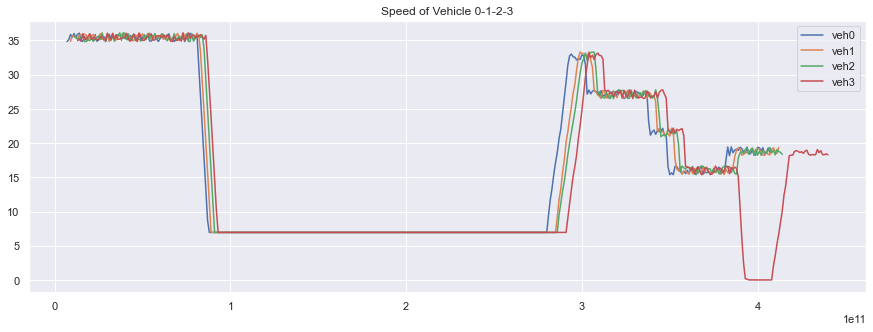

In [22]:
plt.plot(veh0.Time, veh0.Speed.astype(float), label='veh0')
plt.plot(veh1.Time, veh1.Speed.astype(float), label='veh1')
plt.plot(veh2.Time, veh2.Speed.astype(float), label='veh2')
plt.plot(veh3.Time, veh3.Speed.astype(float), label='veh3')
plt.title('Speed of Vehicle 0-1-2-3')
plt.legend()

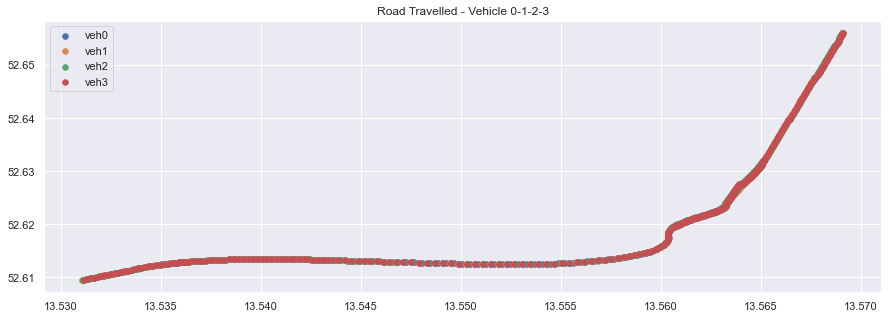

In [29]:
plt.figure()
plt.scatter(np.asfarray(veh0.PositionLongitude),
            np.asfarray(veh0.PositionLatitude),
            linewidths=0.5,
            label='veh0')
plt.scatter(np.asfarray(veh1.PositionLongitude),
            np.asfarray(veh1.PositionLatitude),
            linewidths=0.5,
            label='veh1')
plt.scatter(veh2.PositionLongitude.astype(float),
            veh2.PositionLatitude.astype(float),
            linewidths=0.5,
            label='veh2')
plt.scatter(veh3.PositionLongitude.astype(float),
            veh3.PositionLatitude.astype(float),
            linewidths=0.5,
            label='veh3')
plt.title('Road Travelled - Vehicle 0-1-2-3')
plt.legend()

Note that for the plotting of the GPS coordinates, a type conversion is necessary. The coordinates are read as type `object` but need to be of type `float` to be properly plotted. You can achieve this by either calling the method `.astype(float)` (see veh2 & 3 above) or wrapping the data in `np.asfarray()` (see veh0 & 1) to convert them to a numpy array.

### Configuring the Federates

Eclipse MOSAIC is designed to be extendable using the concept of federates. This will be explained more in detail during the workshop lecture, but simply put, the federates communicate with the main application and affect the behaviour of the vehicles.

Some examples of federates are `cell`, `ns3`, `omnetpp`, `environment`, `application`, `sns` and `sumo`, among others.

Federates are configured using JSON files, which you can very well just edit using any text editor without much hassle. However, we implemented an interface which can be programmatically used to edit and configure the federates.

Hint: It is highly recommended to backup the whole simulation folder before you play with any federate configurations, since it is really easy to type an invalid value and lose track of what you have done. In the worst case scenario, you can restore the simulation easily and start over.

There are two calls and two main methods: `get_federates`, `pprint_curr_fed`, `retrieve_federate(federate, idx)` and `set_federate_value(tree, value)`

In [30]:
mosaic.get_federates

Available federates: ['application', 'cell', 'environment', 'mapping', 'ns3', 'output', 'scenario_config.json', 'sns', 'sumo']


`get_federates` returns a list of all available federates, including `scenario_config.json`. The latter JSON file is not exactly a federate, but still, it is a json file which can be configured with our method.

`retrieve_federate(federate, idx)` is a method which allows you to explore the federate folder, if idx is None, or it retrieves the federate configuration and load it up.

Lets explore `cell` federate:

In [31]:
mosaic.retrieve_federate('cell')

['cell_config.json', 'network.json', 'regions.json']


['cell_config.json', 'network.json', 'regions.json']

From previous experience, I know that `network.json` is the configuration for the cellular network, so lets retrieve that using `idx=1`

In [32]:
mosaic.retrieve_federate('cell', idx=1)

'/Users/wiesner/Dev/eclipse-mosaic/scenarios/Barnim/cell/network.json'

The full path of the retrieved federate is displayed and loaded in the background. Now you can explore the federate configuration using `pprint_curr_fed`

In [33]:
mosaic.pprint_curr_fed

Current federate: network.json
{
    "globalNetwork": {
        "downlink": {
            "capacity": 42200000,
            "multicast": {
                "delay": {
                    "delay": "100 ms",
                    "type": "ConstantDelay"
                },
                "transmission": {
                    "lossProbability": 0.0
                },
                "usableCapacity": 0.6
            },
            "unicast": {
                "delay": {
                    "delay": "100 ms",
                    "type": "ConstantDelay"
                },
                "transmission": {
                    "lossProbability": 0.0,
                    "maxRetries": 2
                }
            }
        },
        "uplink": {
            "capacity": 28000000,
            "delay": {
                "delay": "100 ms",
                "type": "ConstantDelay"
            },
            "transmission": {
                "lossProbability": 0.0,
                "maxRetries": 2
   

A JSON file, for all intents and purposes, acts like a dictionary when loaded in Python.

Using the method `set_federate_value(tree, value)` will set the selected key to the desired value.

The tree is seperated using dot (`.`) as we descend further down the line, for example `"globalNetwork.uplink.delay.expDelay"`

Depending on the tree structure within the json file, the syntax could differ, i.e. `spec = ('events', ['location.area.a'])`.

The current value of `"globalNetwork.uplink.delay.expDelay"` is `"150 ms"`. Notice the quotes and make sure you abide by the type of the existing value.

Lets set this key to `"250 ms"`.

In [34]:
mosaic.set_federate_value('globalNetwork.uplink.delay.expDelay', '250 ms')

Federate value of globalNetwork.uplink.delay.expDelay set to 250 ms


And print our new federate configuration once again to validate the change.

In [35]:
mosaic.pprint_curr_fed

Current federate: network.json
{
    "globalNetwork": {
        "downlink": {
            "capacity": 42200000,
            "multicast": {
                "delay": {
                    "delay": "100 ms",
                    "type": "ConstantDelay"
                },
                "transmission": {
                    "lossProbability": 0.0
                },
                "usableCapacity": 0.6
            },
            "unicast": {
                "delay": {
                    "delay": "100 ms",
                    "type": "ConstantDelay"
                },
                "transmission": {
                    "lossProbability": 0.0,
                    "maxRetries": 2
                }
            }
        },
        "uplink": {
            "capacity": 28000000,
            "delay": {
                "delay": "100 ms",
                "expDelay": "250 ms",
                "type": "ConstantDelay"
            },
            "transmission": {
                "lossProbability": 0.

The new value of `"globalNetwork.uplink.delay.expDelay"` is `"250 ms"`.

Make sure to run the simulation again to observe what kind of changes happen.

In [36]:
!{mosaic.run_simulation(jupyter=True)}

Running: ./mosaic.sh -s Barnim -v
2021-06-30 18:37:19,560 INFO  ROOT - Running Eclipse MOSAIC 21.0 on Java JRE v11.0.9 (Amazon.com Inc.)
2021-06-30 18:37:19,919 INFO  FederationManagement - Start federation with id 'Barnim'
2021-06-30 18:37:19,921 INFO  FederationManagement - Add ambassador/federate with id 'application'
2021-06-30 18:37:19,923 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2021-06-30 18:37:19,923 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2021-06-30 18:37:19,924 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2021-06-30 18:37:19,924 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2021-06-30 18:37:19,924 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2021-06-30 18:37:20,003 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2021-06-30 18:37:20,005 INFO  FederationManagement - Add ambassador/federate with id 'output'
18:37

Thank you for following the introduction and don't forget to play with the tool a little bit more to get used to it. 

Don't forget to report any problems or bugs you might find! We'd be happy to work on it with you!

**See you in the workshop!**